INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


[Plots.jl] Default backend: immerse
[Plots.jl] Initializing backend: immerse



         color: grays
        legend: false
      linetype: scatter
   markershape: ellipse
    markersize: [10,20]
             z: Any[

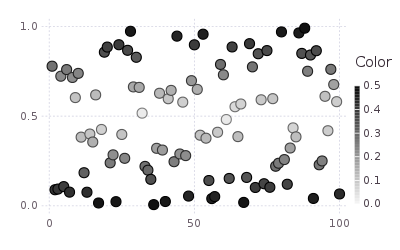

[0.27853175064701796,0.41005743564094055,0.4063126392263827,0.2227202188515267,0.3926713695534525,0.2596126521922748,0.42346127648949694,0.2155346768462798,0.10352958811599677,0.23854544914289266,0.11688317388934877,0.31510851311804466,0.4239011048063106,0.0995502504856749,0.1440353988287133,0.11852741846756754,0.48379726721176297,0.07411191199726552,0.35665479824705204,0.38516706619680496,0.2601261740877805,0.2156045177840471,0.47660425282149754,0.39816976908097024,0.10197962587167986,0.23490466850429836,0.36706947902273046,0.4730237262175585,0.16304520070920558,0.32818754622023594,0.16036808127002145,0.016905953253691042,0.2800359476141836,0.3009637201542943,0.3521757258631424,0.49304300758679154,0.17917575203753633,0.12779566703113532,0.18879626812694994,0.47564626124687126,0.09720946540914577,0.14374336239874452,0.2538369321250771,0.44603959490999023,0.2108592273867793,0.07819553584560412,0.21991375795506252,0.4453523734005935,0.19775969509089286,0.3977347266837521,0.14910367686242

In [1]:
using Plots
default(size=(400,250), leg=false)
y = rand(100)
p = scatter(Any[y], z=Any[abs(y-.5)], m=[10,20], leg=false, c=:grays)

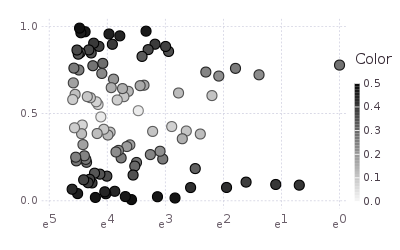

In [3]:
xaxis!(:log, :flip, (e,e^4))

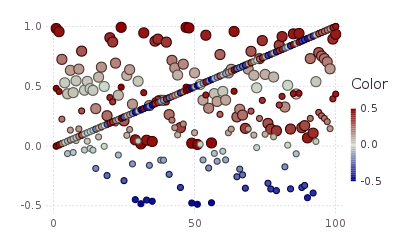

In [4]:
scatter!(linspace(0,1,100), z=Any[y-0.5], c=:bluesreds, xflip=false)

In [40]:
using Plots
#grad = Plots.ColorGradient([colorant"blue", RGB(0.7,0.85,0.7), colorant"darkred"], [0,0.5,1])
#grad = Plots.ColorGradient(:bluesreds)
#grad = Plots.ColorGradient([RGB(.95,.95,.95),RGB(.05,.05,.05)])

function darken(c, v=0.2)
    rgb = RGB(c)
    r = max(0, rgb.r - v)
    g = max(0, rgb.g - v)
    b = max(0, rgb.b - v)
    RGB(r,g,b)
end
function lighten(c, v=0.2)
    darken(c, -v)
end

func = darken
grad = Plots.ColorGradient(map(func, [
    colorant"blue",
    colorant"green",
    #colorant"yellow",
    colorant"orange",
    colorant"red",
    colorant"purple",
    ]))

#grad = Plots.ColorGradient([
#    colorant"lightyellow",
#    colorant"orange",
#    colorant"darkred",
#    #colorant"black"
#    ])
#grad = Plots.ColorGradient(:heat)

function getrange(n::Int)
    zs = zeros(n)
    offset = 0.0
    baseoffset = 0.1
    z = offset
    chg = 0.5
    for i in 1:n
        zs[i] = z
        
        z += chg
        if z > 1.0
            offset += 0.1
            if offset > 0.5
                baseoffset *= 0.5
                offset = baseoffset
            end
            z = offset
#             chg *= 0.5
            #z += chg
        end
    end
    zs
end

function getrange2(n::Int)
    n > 0 || error()
    n == 1 && return zeros(1)
    zs = [0.0, 1.0]
    for i in 3:n
        sorted = sort(zs)
        diffs = diff(sorted)
        widestj = 0
        widest = 0.0
        for (j,d) in enumerate(diffs)
            if d > widest
                widest = d
                widestj = j
            end
        end
        push!(zs, sorted[widestj] + 0.5 * diffs[widestj])
    end
    zs
end

#colors = RGB[Plots.getColorZ(grad,z) for z in 0:0.01:1]
#zs = map(z->z%1.0, 0:.285:3)
zs = getrange2(20)
map(println, zs)
colors = RGB[Plots.getColorZ(grad, z) for z in zs]

0.0


1.0
0.5
0.25
0.75
0.125
0.375
0.625
0.875
0.0625
0.1875
0.3125
0.4375
0.5625
0.6875
0.8125
0.9375
0.03125
0.09375
0.15625


In [13]:
@show RGB[colorant"green", colorant"lightgreen", colorant"darkgreen", RGB(0,1,0)]

RGB[@colorant_str("green"),@colorant_str("lightgreen"),@colorant_str("darkgreen"),RGB(0,1,0)] = ColorTypes.RGB[RGB{U8}(0.0,0.502,0.0),RGB{U8}(0.565,0.933,0.565),RGB{U8}(0.0,0.392,0.0),RGB{U8}(0.0,1.0,0.0)]